In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

In [61]:
#load data to train
data_running = pd.read_csv('list_running_angles.csv')
data_handclapping = pd.read_csv('list_handclapping_angles.csv')
data_handwaving = pd.read_csv('list_handwaving_angles.csv')
data_jogging = pd.read_csv('list_jogging_angles.csv')
data_walking = pd.read_csv('list_walking_angles.csv')
data_boxing = pd.read_csv('list_boxing_15_angles.csv')

In [62]:
X_train_running = data_running.iloc[:,[0,1]]
X_train_handclapping = data_handclapping.iloc[:,[0,1]]
X_train_handwaving = data_handclapping.iloc[:,[0,1]]
X_train_jogging = data_jogging.iloc[:,[0,1]]
X_train_walking = data_walking.iloc[:,[0,1]]
X_train_boxing = data_boxing.iloc[:,[0,1]]

Y_train_running = data_running.iloc[:,2]
Y_train_handclapping = data_handclapping.iloc[:,2]
Y_train_handwaving = data_handclapping.iloc[:,2]
Y_train_jogging = data_jogging.iloc[:,2]
Y_train_walking = data_walking.iloc[:,2]
Y_train_boxing = data_boxing.iloc[:,2]

In [63]:
X_train = np.concatenate((X_train_running, X_train_handclapping, X_train_handwaving, X_train_jogging, X_train_walking, X_train_boxing), axis=0)
Y_train = np.concatenate((Y_train_running, Y_train_handclapping, Y_train_handwaving, Y_train_jogging, Y_train_walking, Y_train_boxing), axis=0)
#X_train = np.concatenate((X_train_running, X_train_boxing), axis=0)
#Y_train = np.concatenate((Y_train_running, Y_train_boxing), axis=0)

In [102]:
for j in range(8):
    for i in range(4):
        if i == 0 and j == 0:
            X_running = pd.read_csv('list_running_person0'+str(j+1)+'_s'+str(i+1)+'.csv')
        else:
            X_running = np.concatenate((X_running, pd.read_csv('list_running_person0'+str(j+1)+'_s'+str(i+1)+'.csv')), axis=0)
        

In [103]:
for j in range(8):
    for i in range(4):
        if i == 0 and j == 0:
            X_boxing = pd.read_csv('list_boxing_person0'+str(j+1)+'_s'+str(i+1)+'.csv')
        else:
            X_boxing = np.concatenate((X_running, pd.read_csv('list_boxing_person0'+str(j+1)+'_s'+str(i+1)+'.csv')), axis=0)
        

In [104]:
X_running.shape

(118715, 3)

In [105]:
X_boxing.shape

(119892, 3)

In [81]:
X_train_running.iloc[:,0]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [305]:
Y_train

array([0, 0, 0, ..., 5, 5, 5])

### SVM classifier

In [64]:
#Definiento un Kernel rbf
#svmClassifier = SVC(kernel='rbf', C = 100, gamma = 0.001)
svmClassifier = SVC(kernel='rbf', gamma = 0.01)

In [65]:
svmClassifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Predict data

In [66]:
#load data
data_running_23 = pd.read_csv('list_test_boxing_angles.csv')
X_test_running = data_running_23.iloc[:,[0,1]]
Y_test_running = data_running_23.iloc[:,2]

In [308]:
Y_test_running = Y_test_running

In [67]:
Y_pred = svmClassifier.predict(X_test_running)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred, Y_test_running)

0.00021748586341887777

In [69]:
Y_pred

array([1, 1, 1, ..., 1, 1, 1])

#### Predict Boxing

In [293]:
#load data
data_boxing_23 = pd.read_csv('list_boxing_23_angles.csv')
X_test_boxing = data_boxing_23.iloc[:,[0,1]]
Y_test_boxing = data_boxing_23.iloc[:,2]

In [294]:
Y_pred_boxing = svmClassifier.predict(X_test_boxing)

In [295]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred_boxing, Y_test_boxing)

0.04806828391734052

In [296]:
Y_pred_boxing

array([1, 1, 1, ..., 1, 1, 1])

### Visualize data

In [297]:
X_set, Y_set = X_train, Y_train
_x1, _x2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),
                    np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))
plt.contourf(_x1,_x2, svmClassifier.predict(np.array([_x1.ravel(), _x2.ravel()]).T).reshape(_x1.shape),
            alpha=0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(_x1.min(), _x1.max())
plt.ylim(_x2.min(), _x2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c = ListedColormap(('red', 'blue'))(i), label=j)
    
plt.title('Super Vector Machine')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

MemoryError: 

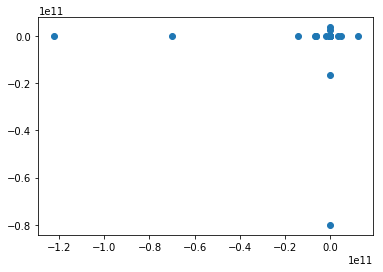

In [11]:
#X_set, Y_set = X_train, Y_train
X_set, Y_set = X_train_running.iloc[:,0], X_train_running.iloc[:,1]
plt.scatter(X_set, Y_set)

In [19]:
X_train_running_v = data_running.iloc[:,0]
X_train_handclapping_v = data_handclapping.iloc[:,0]
X_train_handwaving_v = data_handclapping.iloc[:,0]
X_train_jogging_v = data_jogging.iloc[:,0]
X_train_walking_v = data_walking.iloc[:,0]
X_train_boxing_v = data_boxing.iloc[:,0]

Y_train_running_v = data_running.iloc[:,1]
Y_train_handclapping_v = data_handclapping.iloc[:,1]
Y_train_handwaving_v = data_handclapping.iloc[:,1]
Y_train_jogging_v = data_jogging.iloc[:,1]
Y_train_walking_v = data_walking.iloc[:,1]
Y_train_boxing_v = data_boxing.iloc[:,1]

In [20]:
X_set = np.concatenate((X_train_running_v, X_train_handclapping_v, X_train_handwaving_v, X_train_jogging_v, X_train_walking_v, X_train_boxing_v), axis=0)
Y_set = np.concatenate((Y_train_running_v, Y_train_handclapping_v, Y_train_handwaving_v, Y_train_jogging_v, Y_train_walking_v, Y_train_boxing_v), axis=0)

In [22]:
X_set.shape

(19490,)

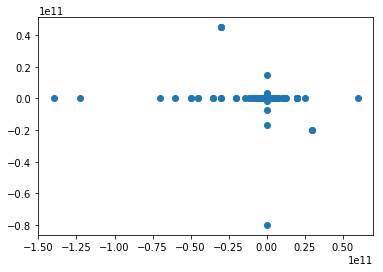

In [21]:
plt.scatter(X_set, Y_set)

In [28]:
prac = pd.read_csv('list_boxing_15_angles.csv')

In [49]:
prac_fil = prac[prac['1'] > -0.000004]
prac_fil = prac_fil[prac_fil['1'] < 2]

In [50]:
X_train_boxing_v = prac_fil.iloc[:,0]
Y_train_boxing_v = prac_fil.iloc[:,1]

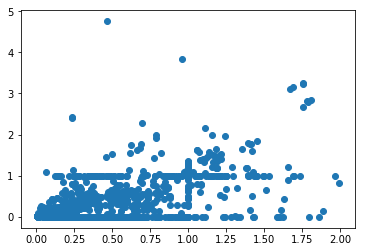

In [51]:
plt.scatter(X_train_boxing_v, Y_train_boxing_v)

In [53]:
prac = pd.read_csv('list_running_angles.csv')

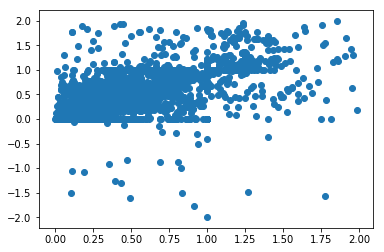

In [60]:
prac_fil = prac[prac['14'] > -0.000004]
prac_fil = prac_fil[prac_fil['14'] < 2]
prac_fil = prac_fil[prac_fil['2'] < 2]
prac_fil = prac_fil[prac_fil['2'] > -2]
X_set = prac_fil.iloc[:,0]
Y_set = prac_fil.iloc[:,1]
plt.scatter(X_set, Y_set)